Basis of Assumed Current-State Rules-Based Targetting

In [2]:
import pandas as pd

In [3]:
userdata2 = pd.read_csv('/Users/aoluwolerotimi/Datasets/user_df2.csv')

/var/folders/z1/1zds15w97_g7_fhs4_83dc3m0000gn/T/ipykernel_77235/475433133.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  userdata2 = pd.read_csv('/Users/aoluwolerotimi/Datasets/user_df2.csv')


In [8]:
userdata2.head().style

,fullVisitorId,FirstChannelVisit,LastChannelVisit,at_least_one_conversion,country,continent,subContinent,TotalVisits,TotalBounces,Organic Search,Social,Direct,Paid Search,Referral,Affiliates,Display,(Other),TotalPageviews,desktop,mobile,tablet,FirstSessionPageviews,LastSessionPageviews,Conversion,CampaignVisits
0,4823595352351,Organic Search,Organic Search,0,China,Asia,Eastern Asia,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
1,5103959234087,Organic Search,Organic Search,0,United States,Americas,Northern America,1,0,1,0,0,0,0,0,0,0,8,0,1,0,8,8,0,0
2,10278554503158,Organic Search,Organic Search,0,New Zealand,Oceania,Australasia,1,0,1,0,0,0,0,0,0,0,8,1,0,0,8,8,0,0
3,20424342248747,Organic Search,Organic Search,0,Peru,Americas,South America,1,0,1,0,0,0,0,0,0,0,13,1,0,0,13,13,0,0
4,26722803385797,Organic Search,Organic Search,0,United Kingdom,Europe,Northern Europe,1,0,1,0,0,0,0,0,0,0,2,1,0,0,2,2,0,0


In [3]:
# create subset of userdata2 with only users who have at least one conversion
userdata2_subset = userdata2[userdata2.at_least_one_conversion == 1]

<Axes: >

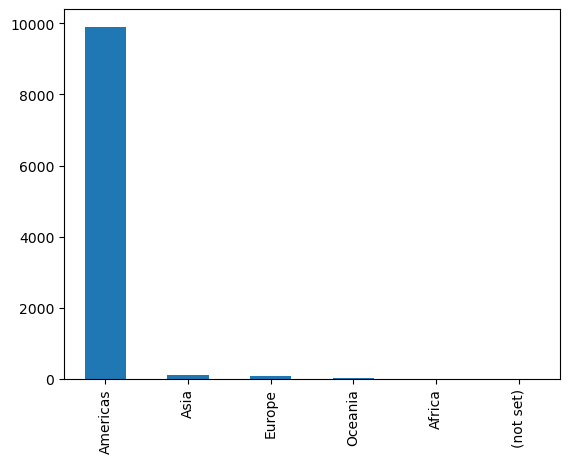

In [4]:
# show bar chart of numbers of users by continent
userdata2_subset['continent'].value_counts().plot(kind='bar')

<Axes: >

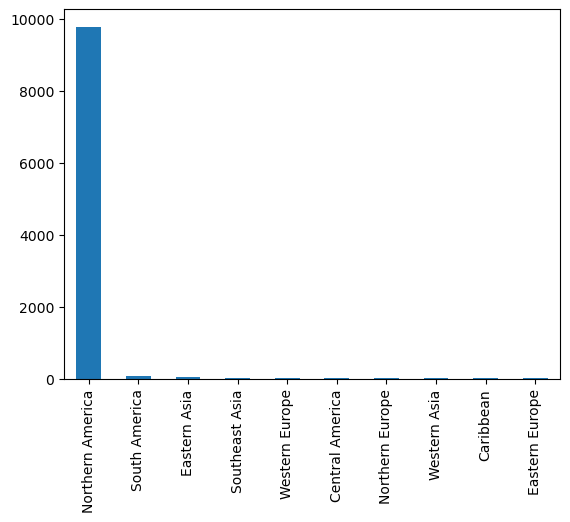

In [6]:
# show top 10 subonctinents with the highest number of users
userdata2_subset['subContinent'].value_counts().head(10).plot(kind='bar')

In [5]:
# show sums of desktop, mobile, and tablet columns
userdata2_subset[['desktop', 'mobile', 'tablet']].sum()

desktop    31029
mobile      2574
tablet       412
dtype: int64

In [6]:
# show proportion of records which has FirstSessionPageviews > 1
userdata2_subset[userdata2_subset.FirstSessionPageviews > 1].shape[0] / userdata2_subset.shape[0]

0.9317777338342891

In [7]:
# get descriptive statistics of FirstSessionPageviews
userdata2_subset.FirstSessionPageviews.describe()

count    10114.000000
mean        19.666601
std         19.679454
min          1.000000
25%          6.000000
50%         16.000000
75%         27.000000
max        466.000000
Name: FirstSessionPageviews, dtype: float64

**Example Rules-Based Prediction**

In [4]:
df = userdata2.copy()

In [5]:
df.head().style

,fullVisitorId,FirstChannelVisit,LastChannelVisit,at_least_one_conversion,country,continent,subContinent,TotalVisits,TotalBounces,Organic Search,Social,Direct,Paid Search,Referral,Affiliates,Display,(Other),TotalPageviews,desktop,mobile,tablet,FirstSessionPageviews,LastSessionPageviews,Conversion,CampaignVisits
0,4823595352351,Organic Search,Organic Search,0,China,Asia,Eastern Asia,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
1,5103959234087,Organic Search,Organic Search,0,United States,Americas,Northern America,1,0,1,0,0,0,0,0,0,0,8,0,1,0,8,8,0,0
2,10278554503158,Organic Search,Organic Search,0,New Zealand,Oceania,Australasia,1,0,1,0,0,0,0,0,0,0,8,1,0,0,8,8,0,0
3,20424342248747,Organic Search,Organic Search,0,Peru,Americas,South America,1,0,1,0,0,0,0,0,0,0,13,1,0,0,13,13,0,0
4,26722803385797,Organic Search,Organic Search,0,United Kingdom,Europe,Northern Europe,1,0,1,0,0,0,0,0,0,0,2,1,0,0,2,2,0,0


In [6]:
df.drop(['TotalVisits','LastSessionPageviews','TotalPageviews'],axis=1,inplace=True)

In [7]:
selected_columns = ['fullVisitorId', 'subContinent', 'FirstSessionPageviews', 'desktop', 'at_least_one_conversion']

In [8]:
df = df[selected_columns]

In [9]:
# get dummies for subContinent
df = pd.get_dummies(df, columns=['subContinent'], drop_first=True)

In [10]:
df.head().style

,fullVisitorId,FirstSessionPageviews,desktop,at_least_one_conversion,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
0,4823595352351,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5103959234087,8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,10278554503158,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20424342248747,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,26722803385797,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [11]:
y=df['at_least_one_conversion']
X=df.drop('at_least_one_conversion',axis=1)

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Stratitified split to maintain the class distribution in the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42,stratify=y_train)

In [14]:
import numpy as np

In [16]:
X_train.head().style

,fullVisitorId,FirstSessionPageviews,desktop,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe
210349,2252551775112275456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
548789,7845012516183994368,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
531645,7562181890229067776,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276851,3354082794737420288,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
89923,649015047046537984,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
# unique values in desktop column
np.unique(X_train['desktop'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  42,  43,  44,  45,  46,  47,  48,  49,  54,  55,  57,
        58,  62,  63,  64,  65,  67,  68,  70,  80,  82,  98, 100, 101,
       119, 134, 152, 186, 188, 245, 262])

In [21]:
def rules_based_prediction(df):
    # Define the condition for prediction
    condition = (df['subContinent_Northern America'] == 1) & \
                (df['desktop'] > 0) & \
                (df['FirstSessionPageviews'] >= 16)
    
    # Apply the condition to the entire DataFrame to generate predictions
    predictions = np.where(condition, 1, 0)
    
    return predictions

In [22]:
rb_ypred_test = rules_based_prediction(X_test)

In [23]:
# create classification report for rules-based prediction vs y_test
print(classification_report(y_test, rb_ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    142738
           1       0.31      0.44      0.36      2023

    accuracy                           0.98    144761
   macro avg       0.65      0.71      0.68    144761
weighted avg       0.98      0.98      0.98    144761

